<a href="https://colab.research.google.com/github/ussalbt/datascience/blob/main/Tree_Types_Prediction_Classification_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#### *ii. Load Dataset*

In [3]:
df = pd.read_csv("/content/sample_data/treetypes.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123.000,2113.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000
1,3269,110,19,134,40,3734,249,216,88.000,3960.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
2,3283,322,18,346,104,4369,170,217,185.000,1330.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,7.000
3,2847,89,31,270,175,1320,248,173,29.000,889.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000
4,3248,93,12,507,118,570,239,221,110.000,945.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177552 entries, 0 to 177551
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           177552 non-null  int64  
 1   Aspect                              177552 non-null  int64  
 2   Slope                               177552 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    177552 non-null  int64  
 4   Vertical_Distance_To_Hydrology      177552 non-null  int64  
 5   Horizontal_Distance_To_Roadways     177552 non-null  int64  
 6   Hillshade_9am                       177552 non-null  int64  
 7   Hillshade_Noon                      177552 non-null  int64  
 8   Hillshade_3pm                       177551 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  177551 non-null  float64
 10  Wilderness_Area_1                   177551 non-null  float64
 11  Wilderness_Area_2         

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,177552.000,2748.631,417.986,1859.000,2375.000,2754.000,3108.000,3857.000
Aspect,177552.000,156.015,109.526,0.000,65.000,125.000,259.000,360.000
Slope,177552.000,16.324,8.311,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,177552.000,227.654,209.290,0.000,66.000,180.000,330.000,1347.000
Vertical_Distance_To_Hydrology,177552.000,50.749,60.864,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,177552.000,1723.421,1334.640,0.000,757.000,1319.000,2299.000,7033.000
Hillshade_9am,177552.000,212.462,30.606,0.000,196.000,220.000,235.000,254.000
Hillshade_Noon,177552.000,218.524,22.663,53.000,206.000,222.000,235.000,254.000
Hillshade_3pm,177551.000,134.419,45.968,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,177551.000,1524.917,1108.719,0.000,737.000,1276.000,2001.000,7150.000


In [7]:
df.apply(lambda x: x.nunique())

Elevation                             1971
Aspect                                 361
Slope                                   57
Horizontal_Distance_To_Hydrology      1272
Vertical_Distance_To_Hydrology         562
Horizontal_Distance_To_Roadways       6411
Hillshade_9am                          205
Hillshade_Noon                         163
Hillshade_3pm                          252
Horizontal_Distance_To_Fire_Points    6272
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [10]:
df_type_dist = pd.DataFrame(df.Cover_Type.value_counts())
df_type_dist["ratio"] = df.Cover_Type.value_counts(normalize = True)*100
df_type_dist.columns = ["count", "ratio"]
df_type_dist

,count,ratio
5.000,25682,14.465
2.000,25478,14.350
1.000,25402,14.307
7.000,25332,14.267
6.000,25298,14.248
4.000,25250,14.221
3.000,25109,14.142


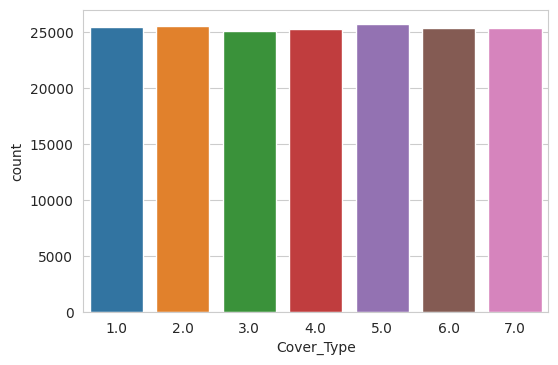

In [11]:
sns.countplot(df.Cover_Type);

findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


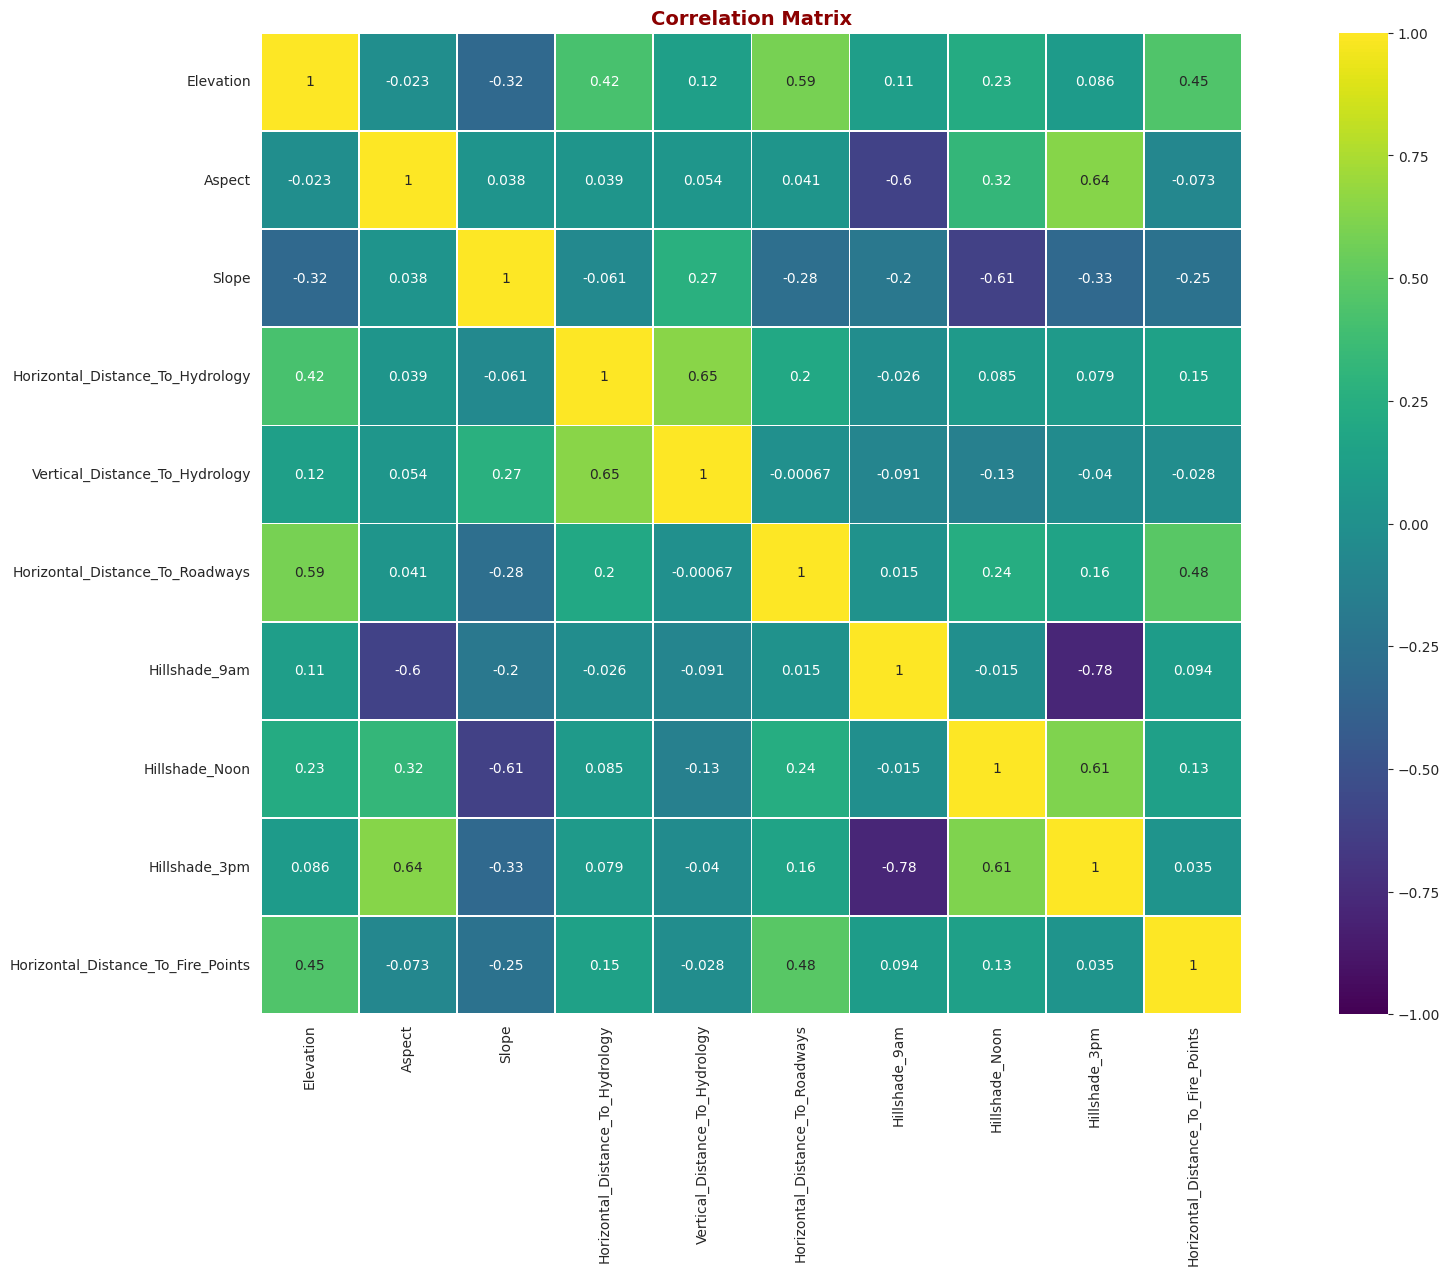

In [12]:
corr_matrix = df[df.columns[:10]].corr()

font_title = {'family': 'times new roman',
              'color': 'darkred',
              'weight': 'bold',
              'size': 14}

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [15]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         1
Horizontal_Distance_To_Fire_Points    1
Wilderness_Area_1                     1
Wilderness_Area_2                     1
Wilderness_Area_3                     1
Wilderness_Area_4                     1
Soil_Type_1                           1
Soil_Type_2                           1
Soil_Type_3                           1
Soil_Type_4                           1
Soil_Type_5                           1
Soil_Type_6                           1
Soil_Type_7                           1
Soil_Type_8                           1
Soil_Type_9                           1
Soil_Type_10                          1
Soil_Type_11                          1


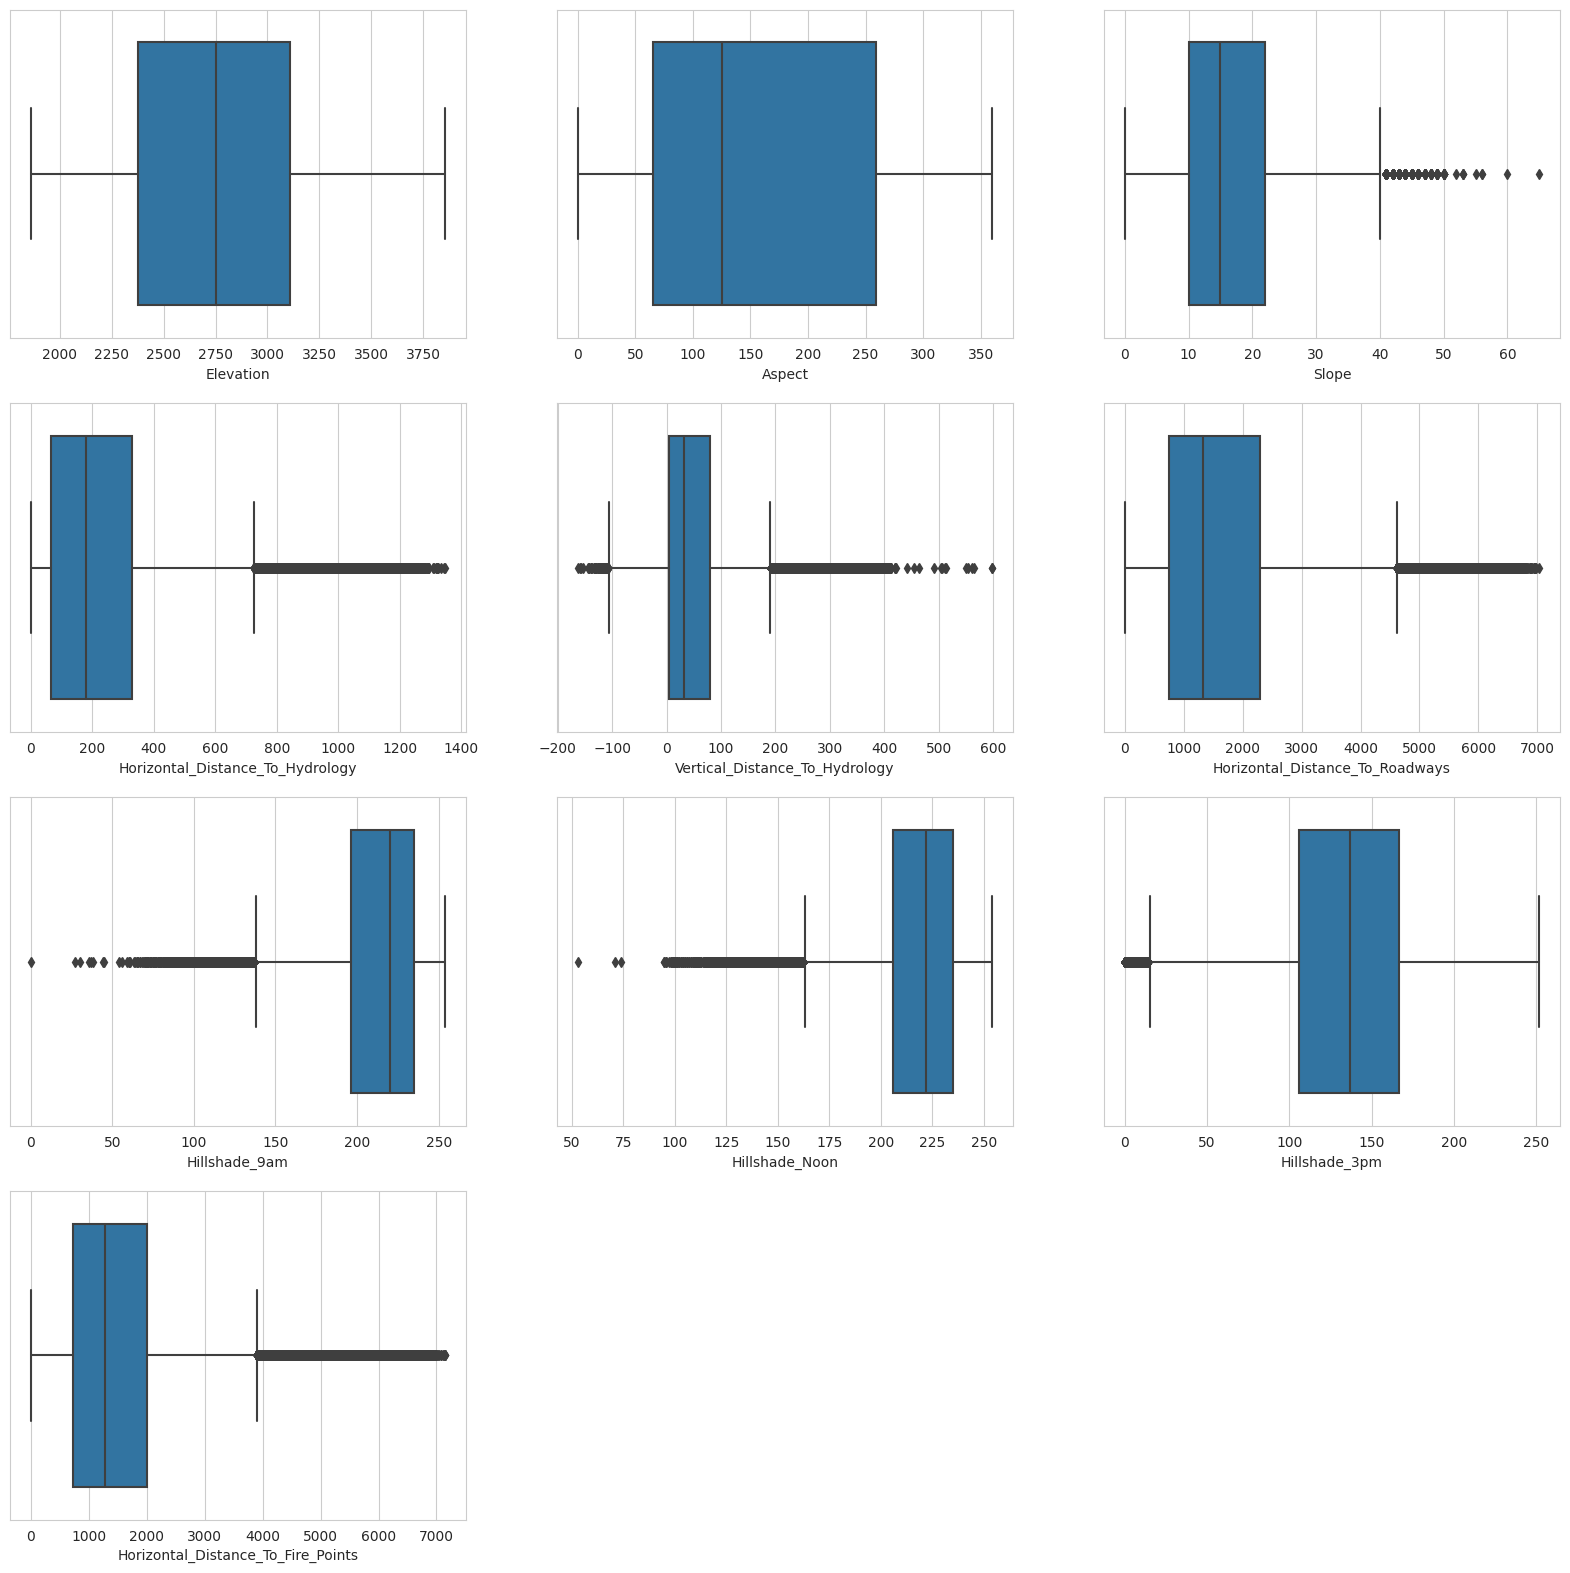

In [16]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=feature, data=df, whis=1.5)

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

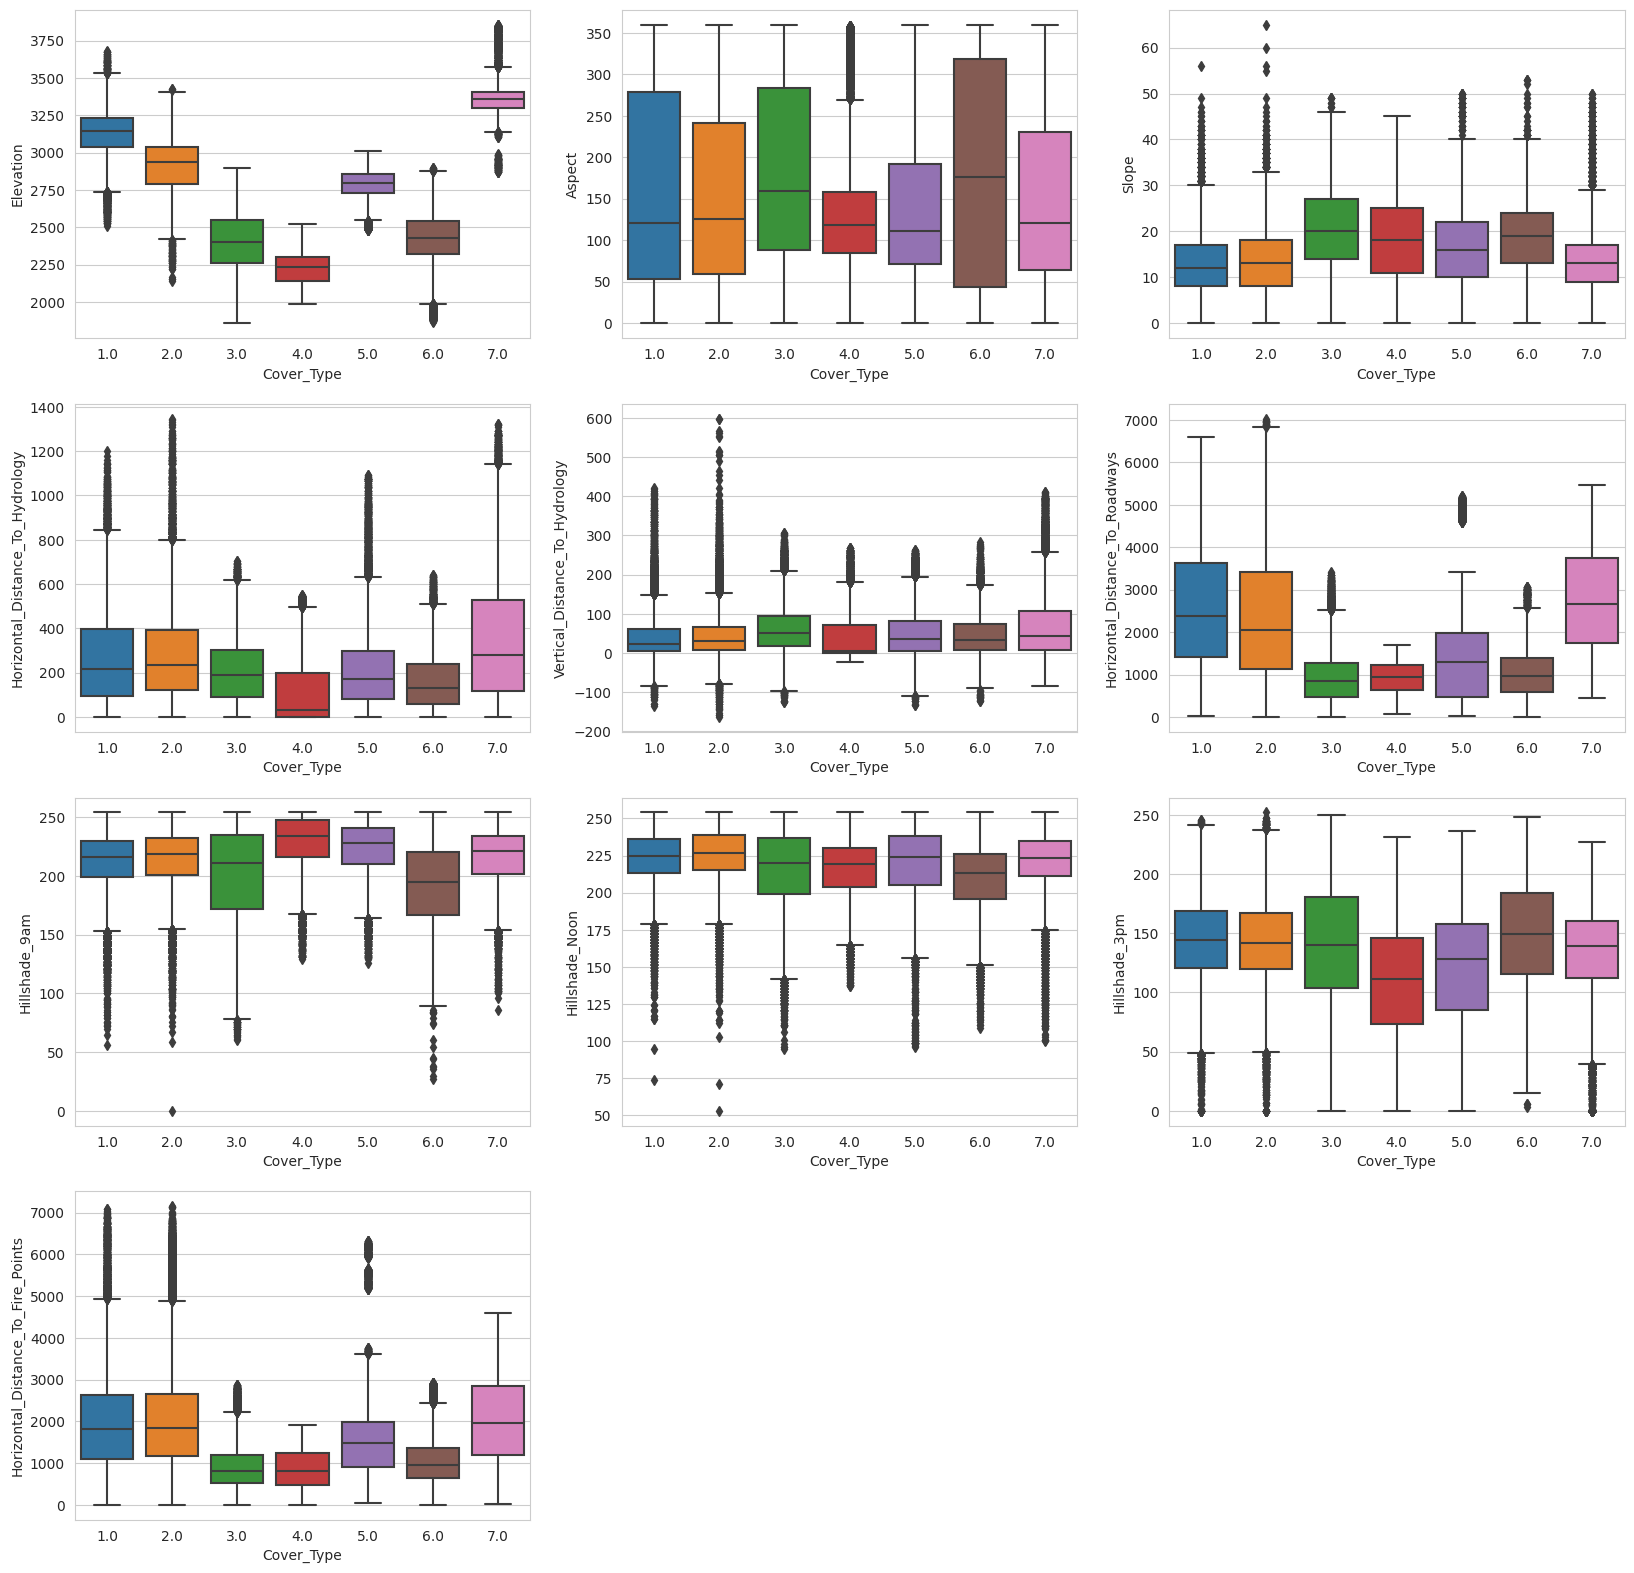

In [18]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = feature, x = "Cover_Type", data = df, whis=1.5)

### Deal with Outliers

#### *ii. Drop Outliers*

In [20]:
from scipy.stats import zscore
from scipy import stats
from numpy import percentile

In [21]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.05, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
    
    df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
    df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    df_outlier['pct'] = df_outlier['pct'].apply(lambda x : x-100 if x == 100 else x)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    IQR_coef = round((best_treshold - 0.675) / 1.35, 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    num_outlier = df_outlier.iloc[df_outlier.pct.argmax(), 1]
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), colors="r", ls = ":")
    plt.annotate("Zscore : {}\nIQR_coef : {}\nValue : {}\nNum_outlier : {}\nPercentile : {}".format(best_treshold,
                                                                          IQR_coef,
                                                                          outlier_limit,
                                                                          num_outlier,     
                                                                          (np.round(percentile_threshold, 3), 
                                                                           np.round(100-percentile_threshold, 3))),
                                                                          (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, IQR_coef, outlier_limit, num_outlier, percentile_threshold)

In [22]:

def outlier_inspect(df, col, min_z = 1, max_z = 5, step = 0.05, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

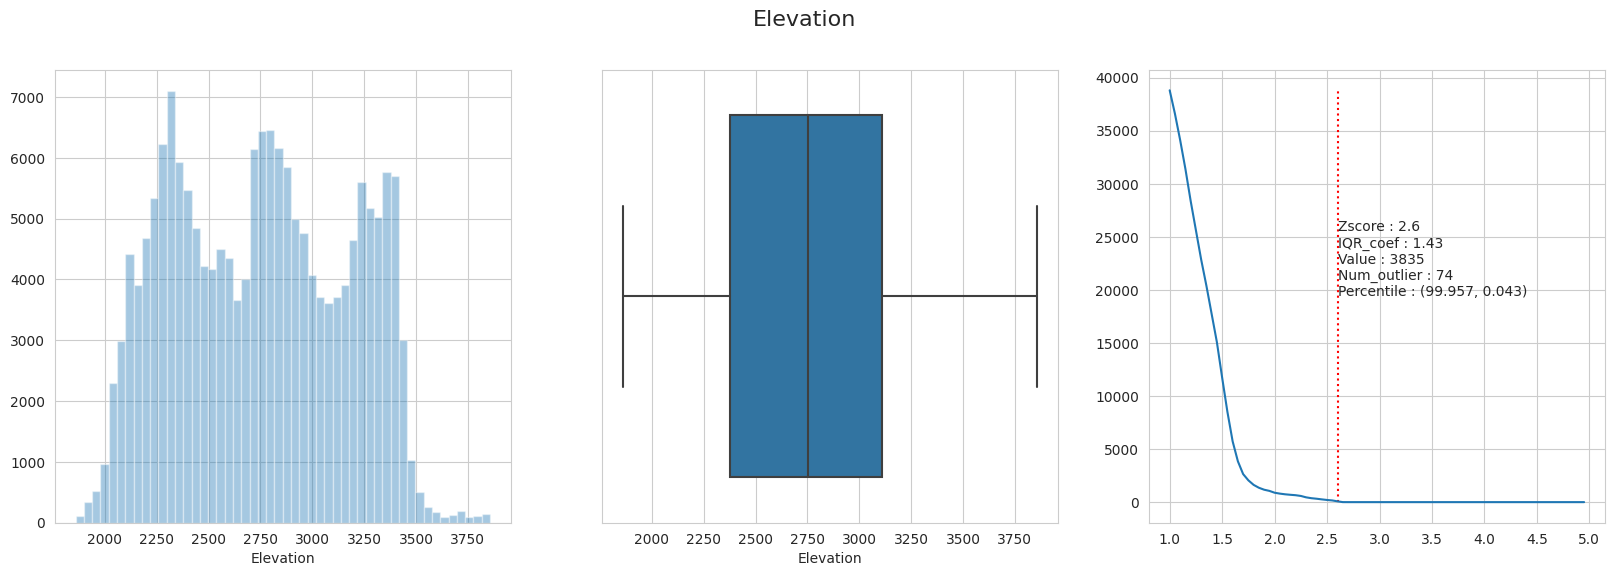

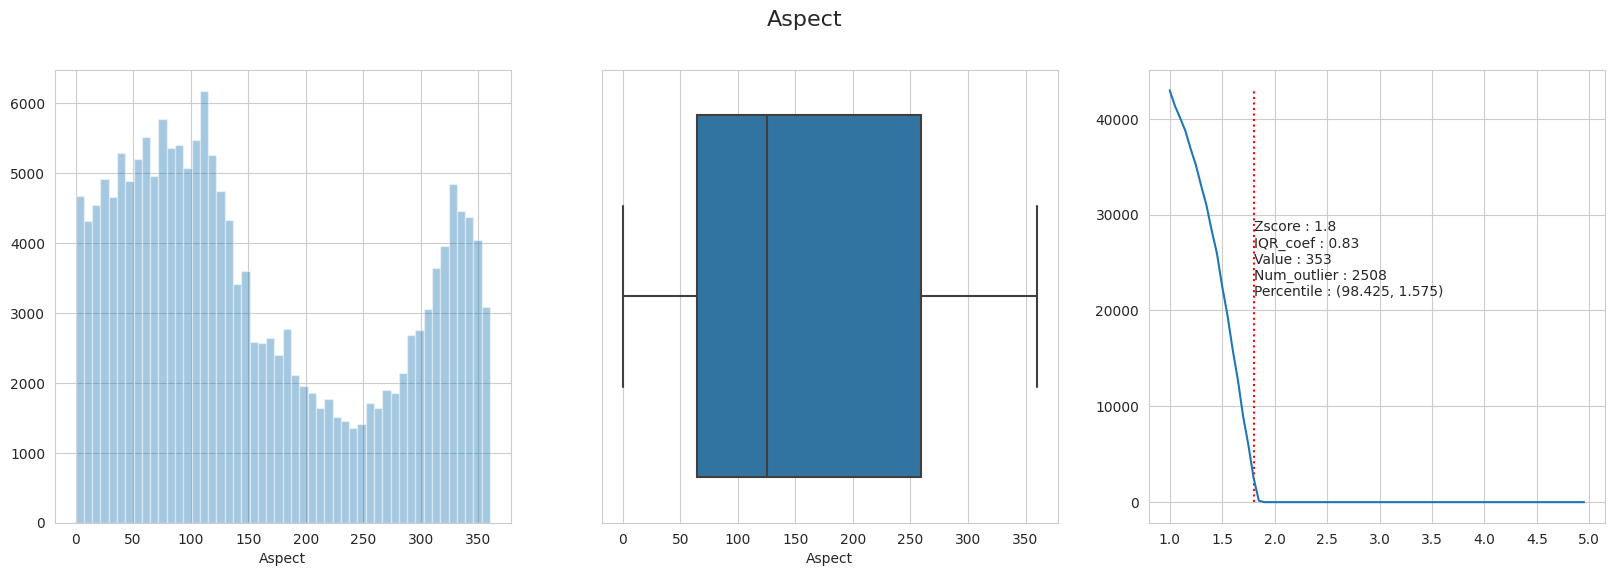

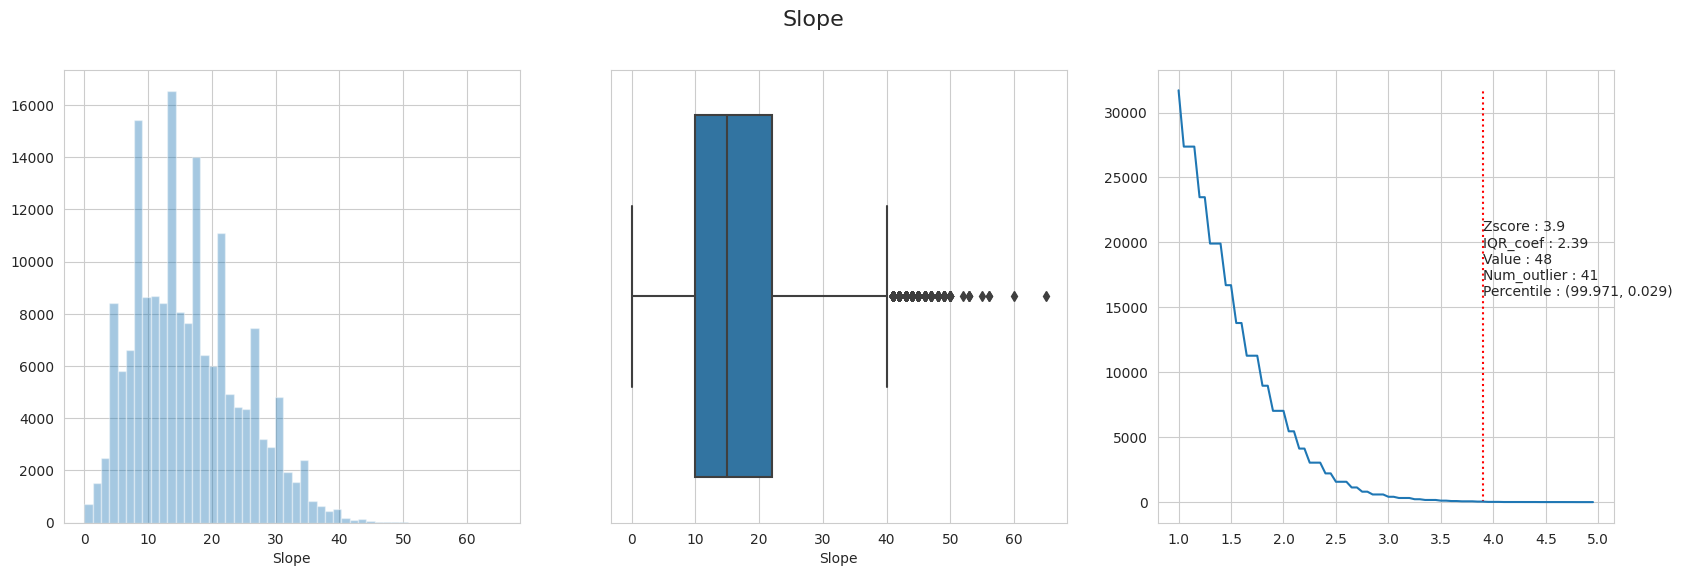

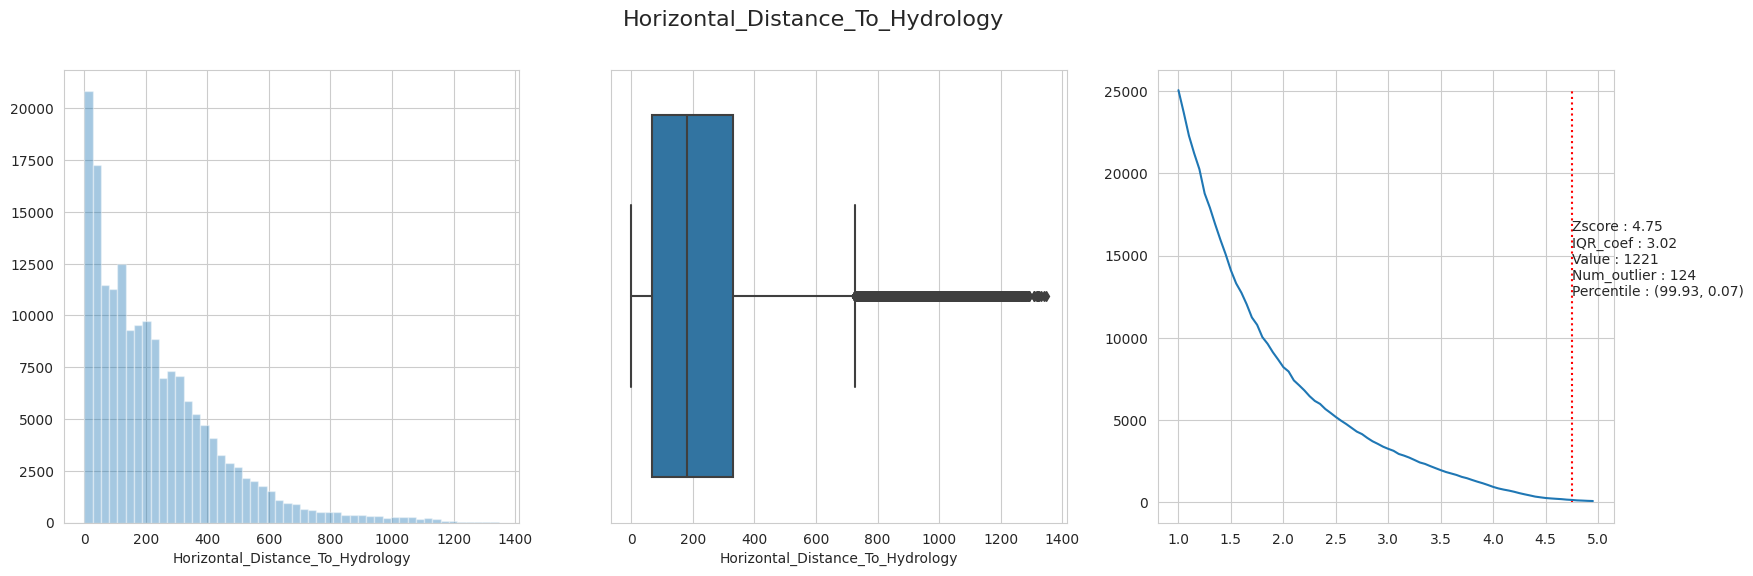

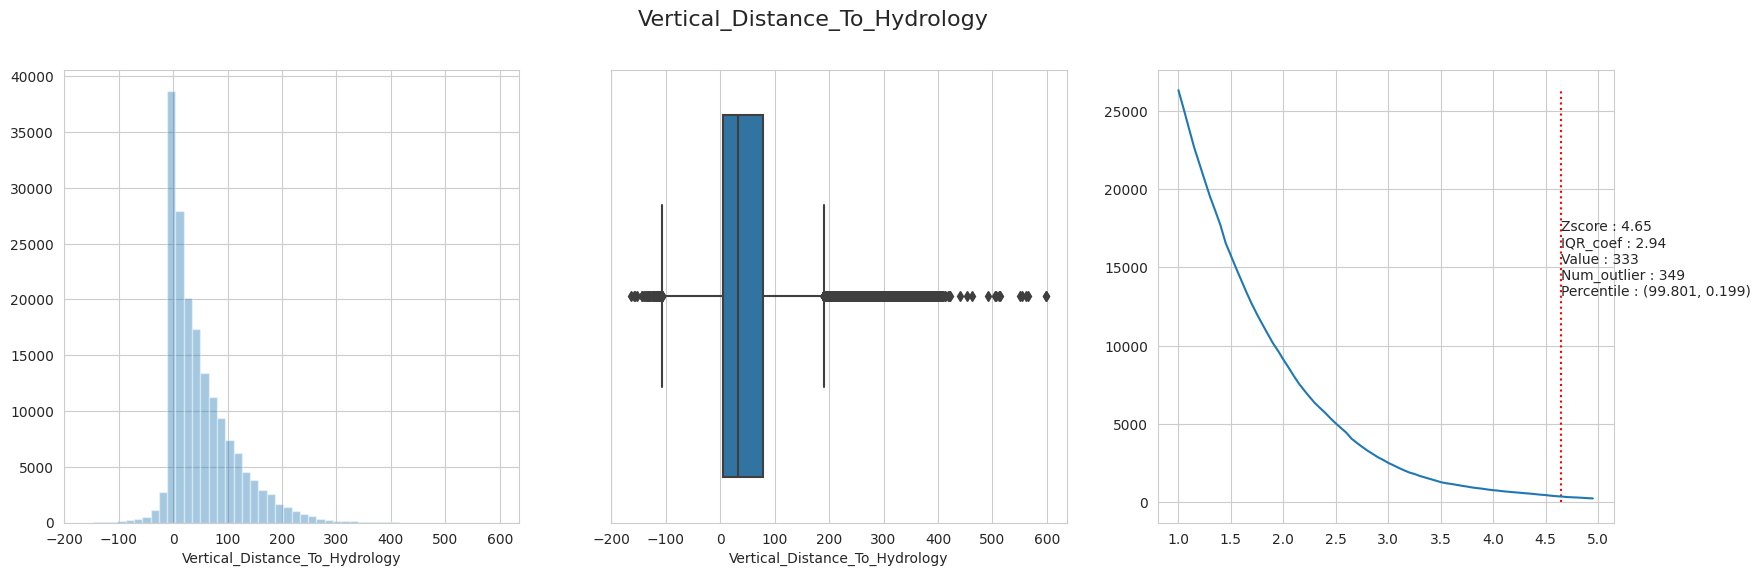

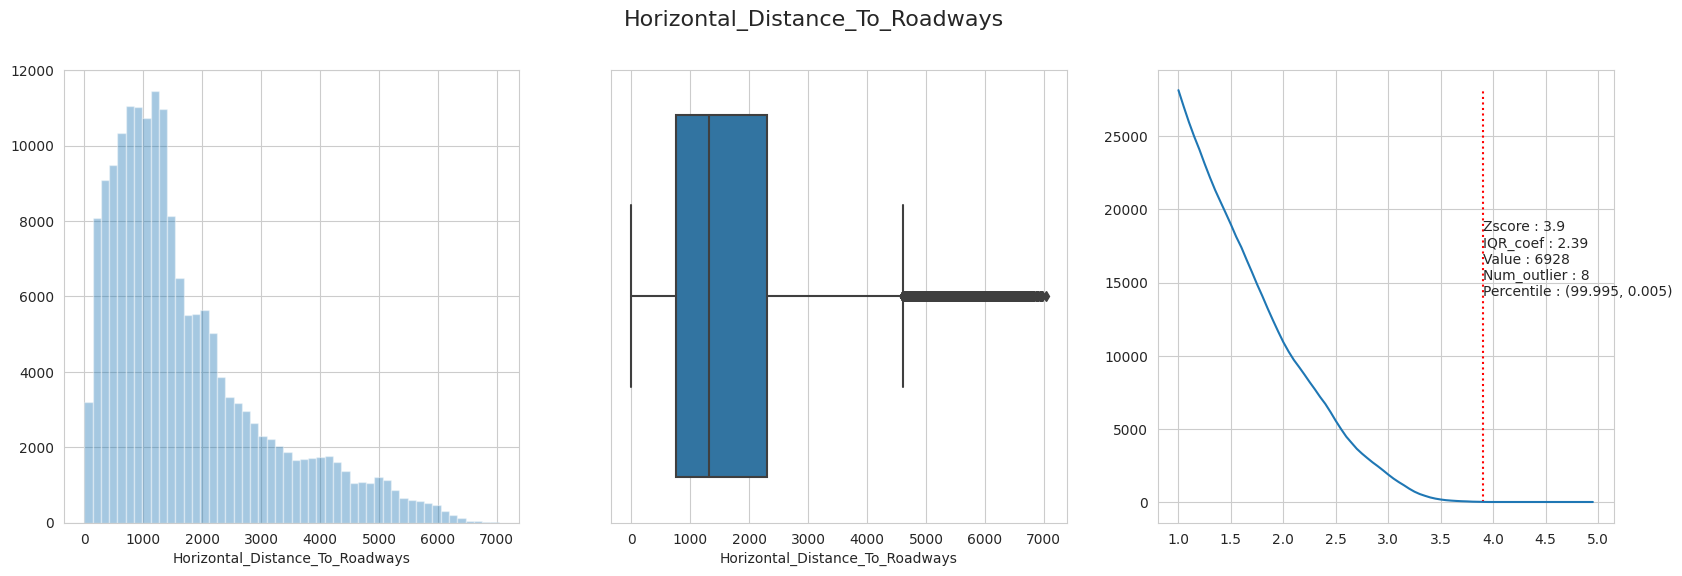

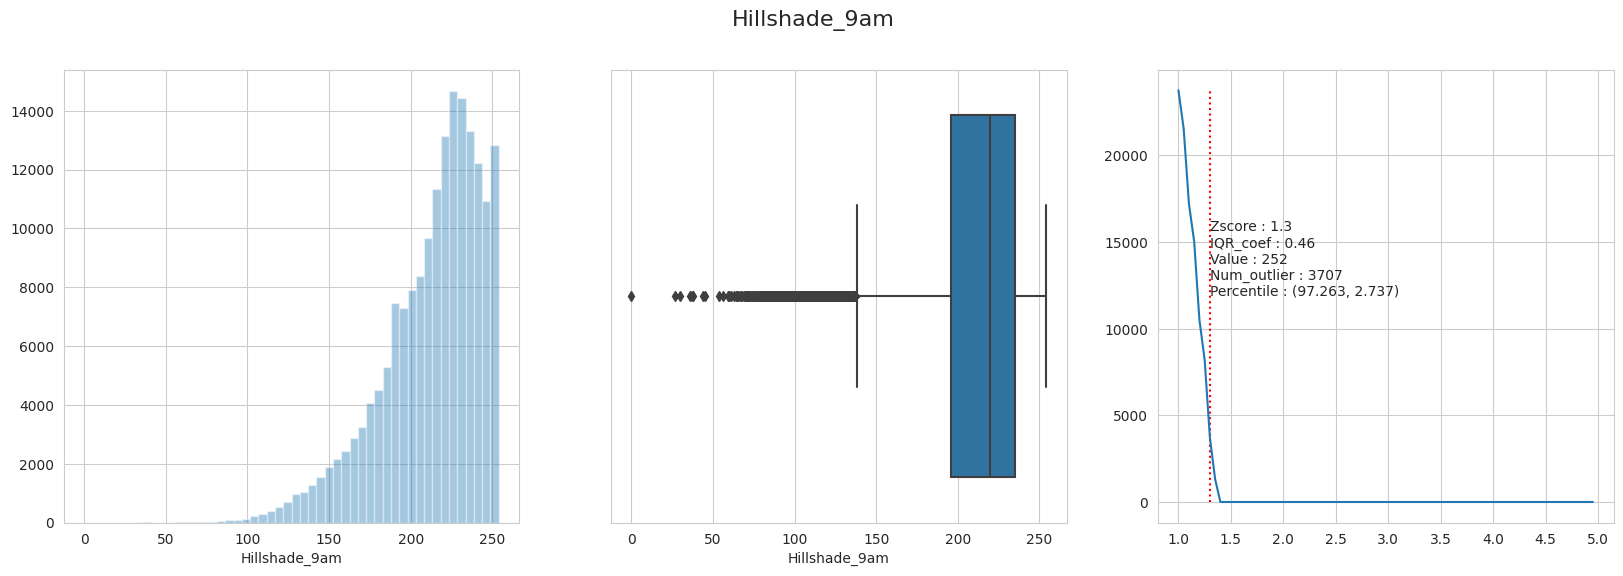

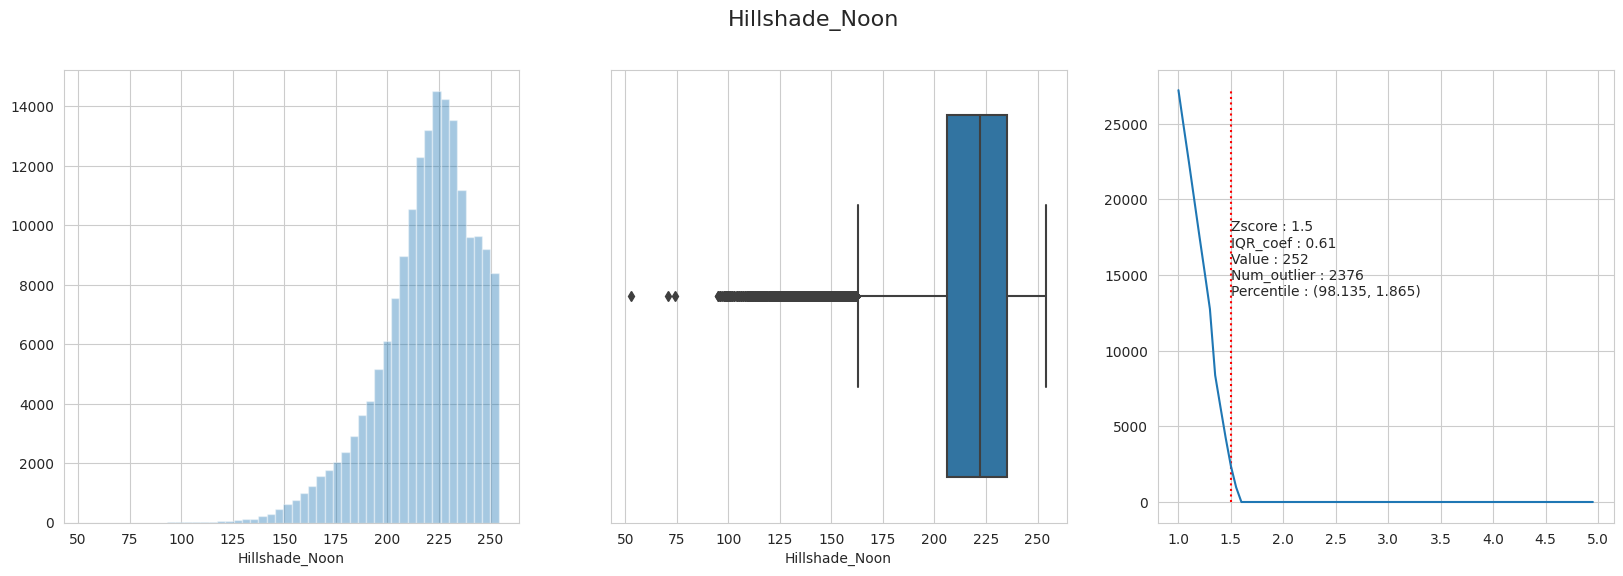

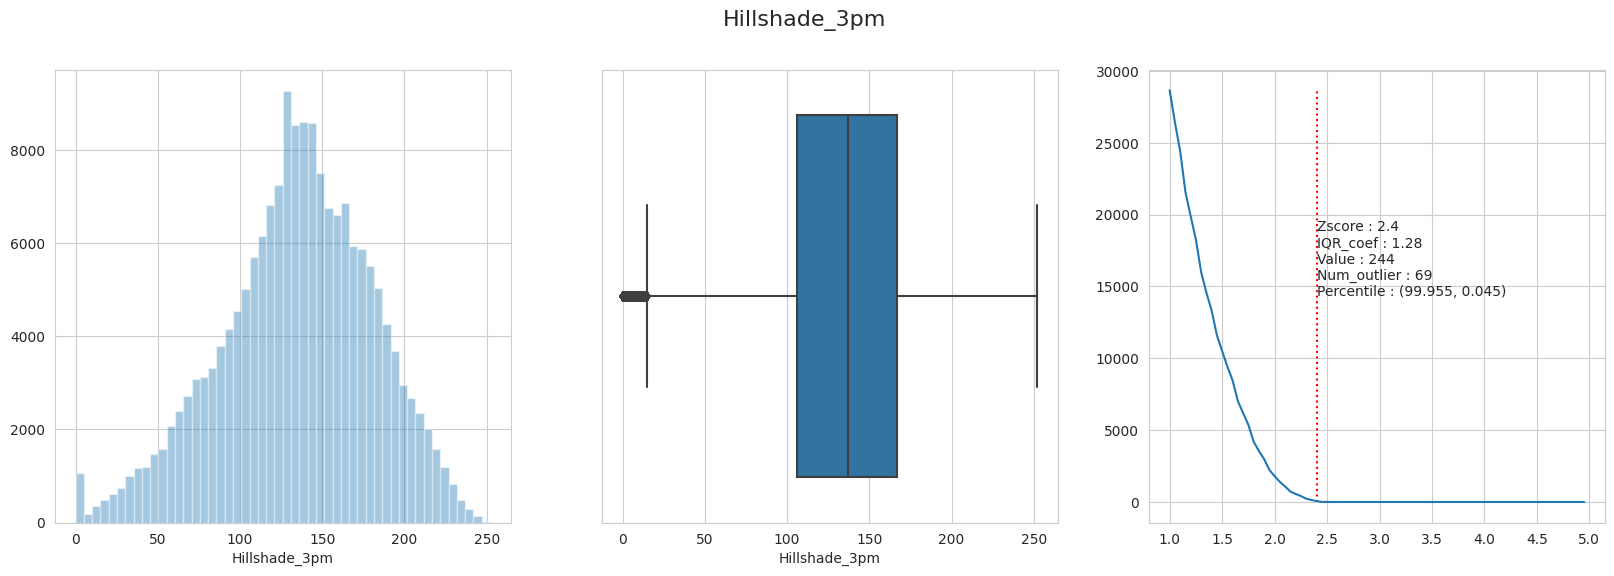

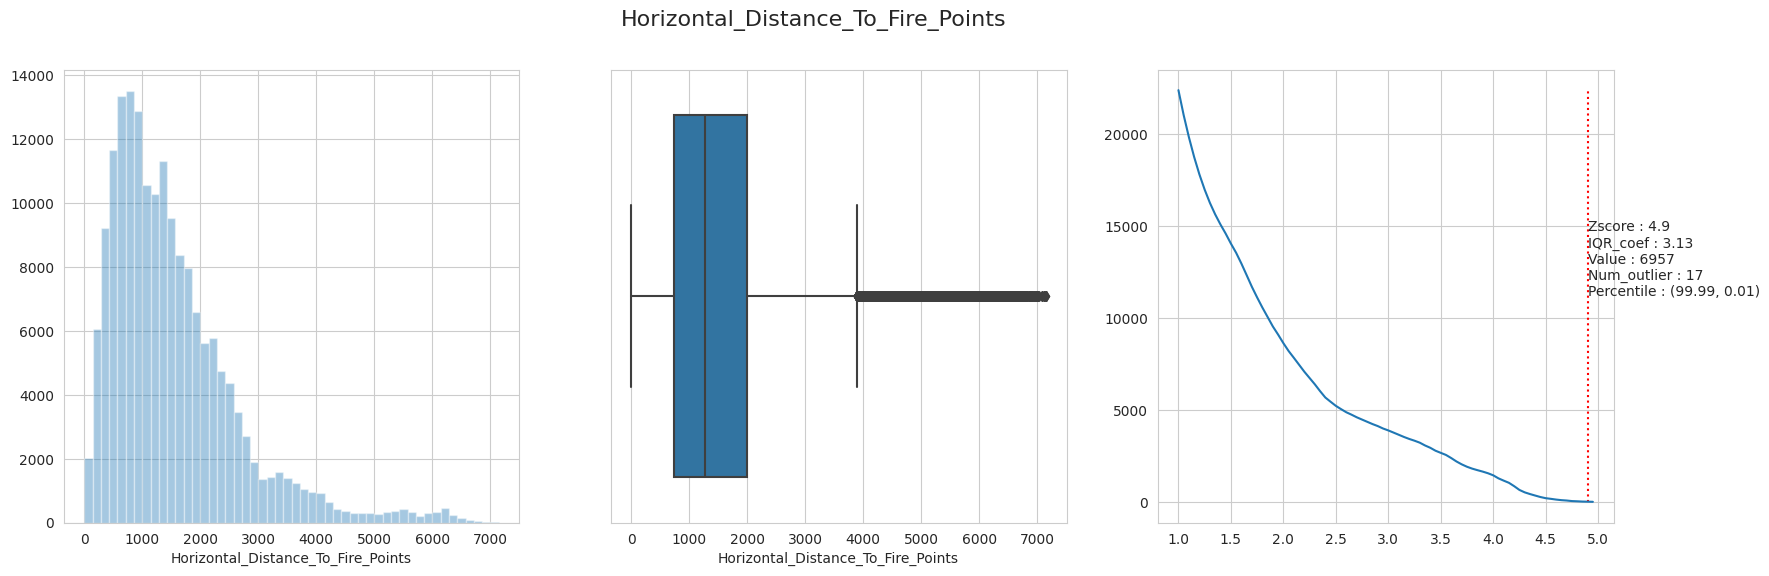

In [24]:
for col in df.columns[:10]:
    outlier_inspect(df, col)

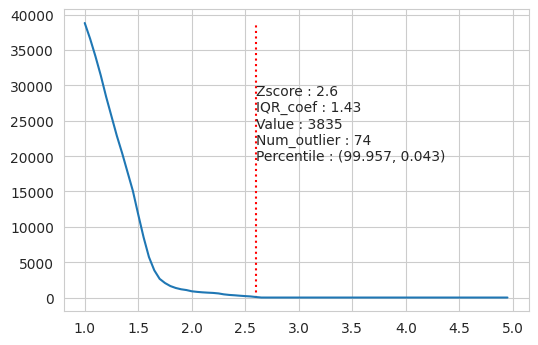

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>,
     threshold  outlier_count    pct
 0       1.000          38805  5.690
 1       1.050          36597  6.815
 2       1.100          34103  7.961
 3       1.150          31388  9.593
 4       1.200          28377  9.730
 5       1.250          25616 10.763
 6       1.300          22859 10.818
 7       1.350          20386 13.043
 8       1.400          17727 15.017
 9       1.450          15065 22.131
 10      1.500          11731 27.406
 11      1.550           8516 32.750
 12      1.600           5727 32.809
 13      1.650           3848 31.315
 14      1.700           2643 22.323
 15      1.750           2053 20.799
 16      1.800           1626 16.667
 17      1.850           1355 13.579
 18      1.900           1171  9.479
 19      1.950           1060 16.321
 20      2.000            887  9.583
 21      2.050            802  7.980
 22      2.100            738  6.233
 23      2.150

In [25]:
outlier_zscore(df, "Elevation")

In [26]:
IQR_coef = 3
z_score = round(0.675 + IQR_coef*1.35, 2)
z_score

4.73

In [27]:
z_score = 3
iqr_coef = round((z_score - 0.675) / 1.35, 2)
iqr_coef

1.72

In [34]:
df = df.copy()

In [35]:
def num_outliers(df, col, whis = 1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    print("Column_name :", col)
    print("whis :", whis)
    print("-------------------------------------------")
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        print("min_threshold:", min_threshold, "\nmax_threshold:", max_threshold)
        num_outliers = len(df[df["Cover_Type"]==i][col][(df[col]<min_threshold) | (df[col]>max_threshold)])
        print(f"Num_of_values for {i} :", len(df[df["Cover_Type"]==i]))
        print(f"Num_of_outliers for {i} :", num_outliers)
        print("-------------------------------------------")
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

In [43]:
def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
        df[col] = df[col].fillna(df.groupby("Cover_Type")[col].transform("mean"))
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

In [42]:
def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

In [46]:
num_outliers(df, "Elevation", whis=3)

Column_name : Elevation
whis : 3
-------------------------------------------
min_threshold: 2441.0 
max_threshold: 3827.0
Num_of_values for 1.0 : 25402
Num_of_outliers for 1.0 : 0
-------------------------------------------
min_threshold: 2048.0 
max_threshold: 3784.0
Num_of_values for 2.0 : 25478
Num_of_outliers for 2.0 : 0
-------------------------------------------
min_threshold: 1396.0 
max_threshold: 3412.0
Num_of_values for 3.0 : 25109
Num_of_outliers for 3.0 : 0
-------------------------------------------
min_threshold: 1651.0 
max_threshold: 2792.0
Num_of_values for 4.0 : 25250
Num_of_outliers for 4.0 : 0
-------------------------------------------
min_threshold: 2360.0 
max_threshold: 3228.0
Num_of_values for 5.0 : 25682
Num_of_outliers for 5.0 : 0
-------------------------------------------
min_threshold: 1652.0 
max_threshold: 3213.0
Num_of_values for 6.0 : 25298
Num_of_outliers for 6.0 : 0
-------------------------------------------
min_threshold: 2985.0 
max_threshold: 372

KeyError: ignored

***
***

In [45]:
remove_outliers(df, "Elevation", whis=3)

KeyError: ignored

In [48]:
num_outliers(df, "Aspect", whis=3)

Column_name : Aspect
whis : 3
-------------------------------------------
min_threshold: -625.0 
max_threshold: 957.0
Num_of_values for 1.0 : 25402
Num_of_outliers for 1.0 : 0
-------------------------------------------
min_threshold: -487.0 
max_threshold: 787.0
Num_of_values for 2.0 : 25478
Num_of_outliers for 2.0 : 0
-------------------------------------------
min_threshold: -497.0 
max_threshold: 868.0
Num_of_values for 3.0 : 25109
Num_of_outliers for 3.0 : 0
-------------------------------------------
min_threshold: -138.0 
max_threshold: 380.0
Num_of_values for 4.0 : 25250
Num_of_outliers for 4.0 : 0
-------------------------------------------
min_threshold: -292.0 
max_threshold: 555.0
Num_of_values for 5.0 : 25682
Num_of_outliers for 5.0 : 0
-------------------------------------------
min_threshold: -782.0 
max_threshold: 1143.0
Num_of_values for 6.0 : 25298
Num_of_outliers for 6.0 : 0
-------------------------------------------
min_threshold: -437.0 
max_threshold: 732.0
Num_o

KeyError: ignored

In [49]:
num_outliers(df, "Slope", whis=3)

Column_name : Slope
whis : 3
-------------------------------------------
min_threshold: -19.0 
max_threshold: 44.0
Num_of_values for 1.0 : 25402
Num_of_outliers for 1.0 : 7
-------------------------------------------
min_threshold: -22.0 
max_threshold: 48.0
Num_of_values for 2.0 : 25478
Num_of_outliers for 2.0 : 5
-------------------------------------------
min_threshold: -25.0 
max_threshold: 66.0
Num_of_values for 3.0 : 25109
Num_of_outliers for 3.0 : 0
-------------------------------------------
min_threshold: -31.0 
max_threshold: 67.0
Num_of_values for 4.0 : 25250
Num_of_outliers for 4.0 : 0
-------------------------------------------
min_threshold: -26.0 
max_threshold: 58.0
Num_of_values for 5.0 : 25682
Num_of_outliers for 5.0 : 0
-------------------------------------------
min_threshold: -20.0 
max_threshold: 57.0
Num_of_values for 6.0 : 25298
Num_of_outliers for 6.0 : 0
-------------------------------------------
min_threshold: -15.0 
max_threshold: 41.0
Num_of_values for 7.0

KeyError: ignored

In [50]:
num_outliers(df, "Horizontal_Distance_To_Hydrology", whis=3)

Column_name : Horizontal_Distance_To_Hydrology
whis : 3
-------------------------------------------
min_threshold: -805.0 
max_threshold: 1295.0
Num_of_values for 1.0 : 25402
Num_of_outliers for 1.0 : 0
-------------------------------------------
min_threshold: -693.0 
max_threshold: 1204.0
Num_of_values for 2.0 : 25478
Num_of_outliers for 2.0 : 37
-------------------------------------------
min_threshold: -541.0 
max_threshold: 936.0
Num_of_values for 3.0 : 25109
Num_of_outliers for 3.0 : 0
-------------------------------------------
min_threshold: -594.0 
max_threshold: 792.0
Num_of_values for 4.0 : 25250
Num_of_outliers for 4.0 : 0
-------------------------------------------
min_threshold: -584.0 
max_threshold: 963.0
Num_of_values for 5.0 : 25682
Num_of_outliers for 5.0 : 89
-------------------------------------------
min_threshold: -480.0 
max_threshold: 780.0
Num_of_values for 6.0 : 25298
Num_of_outliers for 6.0 : 0
-------------------------------------------
min_threshold: -1113

KeyError: ignored

In [51]:
remove_outliers(df, "Horizontal_Distance_To_Hydrology", whis=3)

KeyError: ignored

In [52]:
num_outliers(df, "Vertical_Distance_To_Hydrology", whis=3)

Column_name : Vertical_Distance_To_Hydrology
whis : 3
-------------------------------------------
min_threshold: -170.0 
max_threshold: 236.0
Num_of_values for 1.0 : 25402
Num_of_outliers for 1.0 : 267
-------------------------------------------
min_threshold: -166.0 
max_threshold: 240.0
Num_of_values for 2.0 : 25478
Num_of_outliers for 2.0 : 305
-------------------------------------------
min_threshold: -213.0 
max_threshold: 326.0
Num_of_values for 3.0 : 25109
Num_of_outliers for 3.0 : 0
-------------------------------------------
min_threshold: -216.0 
max_threshold: 288.0
Num_of_values for 4.0 : 25250
Num_of_outliers for 4.0 : 0
-------------------------------------------
min_threshold: -223.0 
max_threshold: 309.0
Num_of_values for 5.0 : 25682
Num_of_outliers for 5.0 : 0
-------------------------------------------
min_threshold: -190.0 
max_threshold: 272.0
Num_of_values for 6.0 : 25298
Num_of_outliers for 6.0 : 5
-------------------------------------------
min_threshold: -293.0 

KeyError: ignored

In [53]:
remove_outliers(df, "Vertical_Distance_To_Hydrology", whis=3)

KeyError: ignored

In [54]:
num_outliers(df, "Horizontal_Distance_To_Roadways", whis=3)

Column_name : Horizontal_Distance_To_Roadways
whis : 3
-------------------------------------------
min_threshold: -5297.0 
max_threshold: 10341.0
Num_of_values for 1.0 : 25402
Num_of_outliers for 1.0 : 0
-------------------------------------------
min_threshold: -5695.0 
max_threshold: 10258.0
Num_of_values for 2.0 : 25478
Num_of_outliers for 2.0 : 0
-------------------------------------------
min_threshold: -2013.0 
max_threshold: 3755.0
Num_of_values for 3.0 : 25109
Num_of_outliers for 3.0 : 0
-------------------------------------------
min_threshold: -1140.0 
max_threshold: 2983.0
Num_of_values for 4.0 : 25250
Num_of_outliers for 4.0 : 0
-------------------------------------------
min_threshold: -4014.0 
max_threshold: 6458.0
Num_of_values for 5.0 : 25682
Num_of_outliers for 5.0 : 0
-------------------------------------------
min_threshold: -1782.0 
max_threshold: 3767.25
Num_of_values for 6.0 : 25298
Num_of_outliers for 6.0 : 0
-------------------------------------------
min_thresh

KeyError: ignored

In [55]:
#remove_outliers(df, "Horizontal_Distance_To_Roadways", whis=3)

In [56]:
num_outliers(df, "Hillshade_9am", whis=3)

Column_name : Hillshade_9am
whis : 3
-------------------------------------------
min_threshold: 106.0 
max_threshold: 323.0
Num_of_values for 1.0 : 25402
Num_of_outliers for 1.0 : 44
-------------------------------------------
min_threshold: 108.0 
max_threshold: 325.0
Num_of_values for 2.0 : 25478
Num_of_outliers for 2.0 : 51
-------------------------------------------
min_threshold: -17.0 
max_threshold: 424.0
Num_of_values for 3.0 : 25109
Num_of_outliers for 3.0 : 0
-------------------------------------------
min_threshold: 120.0 
max_threshold: 344.0
Num_of_values for 4.0 : 25250
Num_of_outliers for 4.0 : 0
-------------------------------------------
min_threshold: 117.0 
max_threshold: 334.0
Num_of_values for 5.0 : 25682
Num_of_outliers for 5.0 : 0
-------------------------------------------
min_threshold: 8.0 
max_threshold: 379.0
Num_of_values for 6.0 : 25298
Num_of_outliers for 6.0 : 0
-------------------------------------------
min_threshold: 106.0 
max_threshold: 330.0
Num_of

KeyError: ignored

In [57]:
remove_outliers(df, "Hillshade_9am", whis=3)

KeyError: ignored

In [58]:
num_outliers(df, "Hillshade_Noon", whis=3)

Column_name : Hillshade_Noon
whis : 3
-------------------------------------------
min_threshold: 144.0 
max_threshold: 305.0
Num_of_values for 1.0 : 25402
Num_of_outliers for 1.0 : 32
-------------------------------------------
min_threshold: 143.0 
max_threshold: 311.0
Num_of_values for 2.0 : 25478
Num_of_outliers for 2.0 : 34
-------------------------------------------
min_threshold: 85.0 
max_threshold: 351.0
Num_of_values for 3.0 : 25109
Num_of_outliers for 3.0 : 0
-------------------------------------------
min_threshold: 126.0 
max_threshold: 308.0
Num_of_values for 4.0 : 25250
Num_of_outliers for 4.0 : 0
-------------------------------------------
min_threshold: 106.0 
max_threshold: 337.0
Num_of_values for 5.0 : 25682
Num_of_outliers for 5.0 : 25
-------------------------------------------
min_threshold: 106.0 
max_threshold: 316.0
Num_of_values for 6.0 : 25298
Num_of_outliers for 6.0 : 0
-------------------------------------------
min_threshold: 139.0 
max_threshold: 307.0
Num

KeyError: ignored

In [59]:
remove_outliers(df, "Hillshade_Noon", whis=3)

KeyError: ignored

In [60]:
num_outliers(df, "Hillshade_3pm", whis=3)

Column_name : Hillshade_3pm
whis : 3
-------------------------------------------
min_threshold: -23.0 
max_threshold: 313.0
Num_of_values for 1.0 : 25402
Num_of_outliers for 1.0 : 0
-------------------------------------------
min_threshold: -21.0 
max_threshold: 308.0
Num_of_values for 2.0 : 25478
Num_of_outliers for 2.0 : 0
-------------------------------------------
min_threshold: -127.0 
max_threshold: 412.0
Num_of_values for 3.0 : 25109
Num_of_outliers for 3.0 : 0
-------------------------------------------
min_threshold: -146.0 
max_threshold: 365.0
Num_of_values for 4.0 : 25250
Num_of_outliers for 4.0 : 0
-------------------------------------------
min_threshold: -134.0 
max_threshold: 377.0
Num_of_values for 5.0 : 25682
Num_of_outliers for 5.0 : 0
-------------------------------------------
min_threshold: -88.0 
max_threshold: 388.0
Num_of_values for 6.0 : 25298
Num_of_outliers for 6.0 : 0
-------------------------------------------
min_threshold: -32.0 
max_threshold: 304.0
Num

KeyError: ignored

In [61]:
#remove_outliers(df, "Hillshade_3pm", whis=3)

In [62]:
num_outliers(df, "Horizontal_Distance_To_Fire_Points", whis=3)

Column_name : Horizontal_Distance_To_Fire_Points
whis : 3
-------------------------------------------
min_threshold: -3484.0 
max_threshold: 7226.0
Num_of_values for 1.0 : 25402
Num_of_outliers for 1.0 : 0
-------------------------------------------
min_threshold: -3279.0 
max_threshold: 7119.5
Num_of_values for 2.0 : 25478
Num_of_outliers for 2.0 : 4
-------------------------------------------
min_threshold: -1551.0 
max_threshold: 3265.0
Num_of_values for 3.0 : 25109
Num_of_outliers for 3.0 : 0
-------------------------------------------
min_threshold: -1871.0 
max_threshold: 3589.0
Num_of_values for 4.0 : 25250
Num_of_outliers for 4.0 : 0
-------------------------------------------
min_threshold: -2354.0 
max_threshold: 5234.0
Num_of_values for 5.0 : 25682
Num_of_outliers for 5.0 : 800
-------------------------------------------
min_threshold: -1517.0 
max_threshold: 3516.0
Num_of_values for 6.0 : 25298
Num_of_outliers for 6.0 : 0
-------------------------------------------
min_thre

KeyError: ignored

In [63]:
remove_outliers(df, "Horizontal_Distance_To_Fire_Points", whis=3)

KeyError: ignored

In [64]:
df.shape

(177552, 55)

In [65]:
df.isnull().sum().sum()

47

In [66]:
df.dropna(inplace=True)

In [67]:
df.isnull().sum().sum()

0

In [68]:
df.shape[0] - df.shape[0] 

0

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [70]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [72]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [74]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision_macro" : precision_score(y_train, y_train_pred, average = "macro"),
                            "Recall_macro" : recall_score(y_train, y_train_pred, average = "macro"),                          
                            "f1_macro" : f1_score(y_train, y_train_pred, average = "macro")},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision_macro" : precision_score(y_test, y_pred, average = "macro"),
                           "Recall_macro" : recall_score(y_test, y_pred, average = "macro"),                          
                           "f1_macro" : f1_score(y_test, y_pred, average = "macro")}}
    
    return pd.DataFrame(scores)

In [75]:
def model_performance(y_train, y_train_pred, y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------")
    print(train_val(y_train, y_train_pred, y_test, y_pred))

In [76]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [77]:
def plot_multiclass_roc_for_svm(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___